<a href="https://colab.research.google.com/github/AtharvPandey/DataAnalytics/blob/master/nifty_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k = 1: Mean accuracy = 0.9423714511832175, Std deviation = 0.006891731301736116
k = 2: Mean accuracy = 0.9401326452130684, Std deviation = 0.005600453388030681
k = 3: Mean accuracy = 0.94296924637455, Std deviation = 0.005605316603269998
k = 4: Mean accuracy = 0.9429699151739435, Std deviation = 0.00614936001245387
k = 5: Mean accuracy = 0.9440149142264778, Std deviation = 0.005899098720065947
k = 6: Mean accuracy = 0.9425220425133481, Std deviation = 0.006046752301742081
k = 7: Mean accuracy = 0.9449103251479718, Std deviation = 0.004496866264940874
k = 8: Mean accuracy = 0.9438654375620033, Std deviation = 0.005227541353135563
k = 9: Mean accuracy = 0.9438659948948314, Std deviation = 0.007734102750585486
k = 10: Mean accuracy = 0.9428204385094692, Std deviation = 0.004946231253225992
k = 11: Mean accuracy = 0.9428213302419939, Std deviation = 0.007748254248397655
k = 12: Mean accuracy = 0.9419249161214094, Std deviation = 0.005979815963881067
k = 13: Mean accuracy = 0.94297024957364

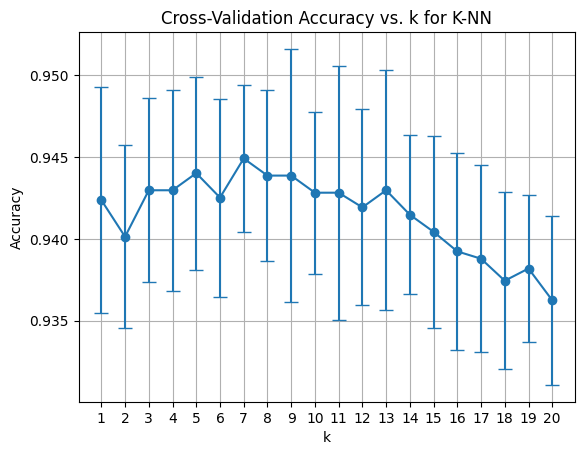

Best k: 7


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the data
nifty_500 = pd.read_csv("/content/nifty_500.csv")

# Drop rows with NaN or infinite values
nifty_500 = nifty_500.dropna()
nifty_500 = nifty_500.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and labels
X = nifty_500[["pe", "payout"]].values
y = nifty_500["future_crash"].values

# Define the range of k values to evaluate
k_values = range(1, 21)  # You can adjust this range as needed

# Initialize lists to store cross-validation scores for each k
cv_scores_mean = []
cv_scores_std = []

# Perform n-fold cross-validation for each k
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for k in k_values:
    try:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=kf)
        cv_scores_mean.append(np.mean(scores))
        cv_scores_std.append(np.std(scores))
        print(f"k = {k}: Mean accuracy = {np.mean(scores)}, Std deviation = {np.std(scores)}")
    except Exception as e:
        print(f"An error occurred for k = {k}: {e}")

# Plotting cross-validation accuracy versus k
plt.errorbar(k_values, cv_scores_mean, yerr=cv_scores_std, fmt='-o', capsize=5)
plt.title('Cross-Validation Accuracy vs. k for K-NN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k based on cross-validation
best_k = k_values[np.argmax(cv_scores_mean)]
print("Best k:", best_k)
